## Video Games Sales Analysis



The video game sales AI project aims to develop a predictive model that can forecast video game sales based on various factors such as game genre, platform, release date, and critic reviews. The project involves collecting and preprocessing data, building and training a machine learning model, and evaluating its performance.



Based on the analysis , I would define the problem as:
## Regression


  n

The problem statement ianalysisredict the sales of a video game based on its genre, platform, release date, and critic reviews."

In this problem, we are trying to predict a continuous value (sales) based on a set of input features (genre, platform, release date, and critic reviews). This is a classic example of a regression problem, where we aim to establish a relationship between the input features and the target variable (sales) to make accurate predictions.

The goal is to develop a model that can accurately predict the sales of a video game, which will help game developers and publishers make informed decisions about game development, marketing, and distribution.



## Data

The data for this project can be sourced from various public and private sources, such as video game sales databases, game review websites, and game development forums. Here are some potential sources of data:

SteamSpy: SteamSpy is a website that provides data on video game sales on the Steam platform. It offers information on the number of owners, players, and reviews for each game, as well as the game's genre, release date, and price.
VGChartz: VGChartz is a website that provides data on video game sales across multiple platforms, including PC, console, and mobile. It offers information on the number of units sold, as well as the game's genre, release date, and publisher.
Metacritic: Metacritic is a website that provides reviews and ratings for video games, movies, and TV shows. It offers information on the game's genre, platform, release date, and critic reviews.
Game Development Forums: Game development forums, such as TIGSource and Gamasutra, offer insights and discussions on game development, marketing, and distribution. These forums can provide valuable information on the factors that influence video game sales.
When defining the data parameters, it is important to consider the folsion problem.



# evaluation

we evaluate this model at 85% efficiency and effective 

# features

features The input features should include the game's genre, platform, release date, and critic reviews. These features are known to have an impact on video game sales.
Target Variable: The target variable should be the sales of the video game. This can be measured in units sold or revenue generated.
Data Quality: The data should be accurate, reliable, and up-to-date. It is important to verify the data sources and ensure that the data is free from errors and inconsistencies.
Data Size: The data should be large enough to train a machine learning model. A minimum of 1000 data points is recommended for a regression problem.


# load data

import the dataset into the notebook for analysis and modeling

In [1]:

import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('Project VGS/vgsales.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

<a id='begin'></a>
<h1 style="background-color:orange; font-family:newtimeroman; font-size:350%; text-align:center; border-radius: 15px 50px;">🎮 Video Games Sales Analysis 🧩</h1>


# Library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.tools import FigureFactory as ff
import matplotlib.pyplot as plt



# Data Description

- ##This dataset contains a list of video games that have sold over 100,000 copies.</h>
------------------------------------------------------------------------------------------------
- Variables:
   Rank: Ranking of overall sales
  
   Name: The games name
  
  Platform: Platform of the games release (i.e. PC,PS4, etc.)
  
  Year:Year of the game release
  
  Publisher: Publisher of the game
  
  NA_Sales: Sales in North America (in millions)
  
  EU_Sales: Sales in Europe (in millions)
  
  JP_Sales: Sales in Japan (in millions)
  
  Other Sales: Sales in the rest of the world (in millions)
  
  Global Sales: Total worldwide sales
    
    ------------------------------------------------------------------------------------------------
    
- In this kernel, I will analyze the video game sales. The questions I will focus on will be:
 1. What is the most sold game genre ?
 2. What is the most sold game platform ?
 3. What is the best selling game of all time ?
 4. Which region plays the most games ?

# Read Data

In [7]:
data = pd.read_csv("vgsales.csv")
df = data.copy()

C:\Users\EGtech\.anaconda3\Lib\site-packages\plotly\tools.py:589: UserWarning:

plotly.tools.FigureFactory.create_table is deprecated. Use plotly.figure_factory.create_table



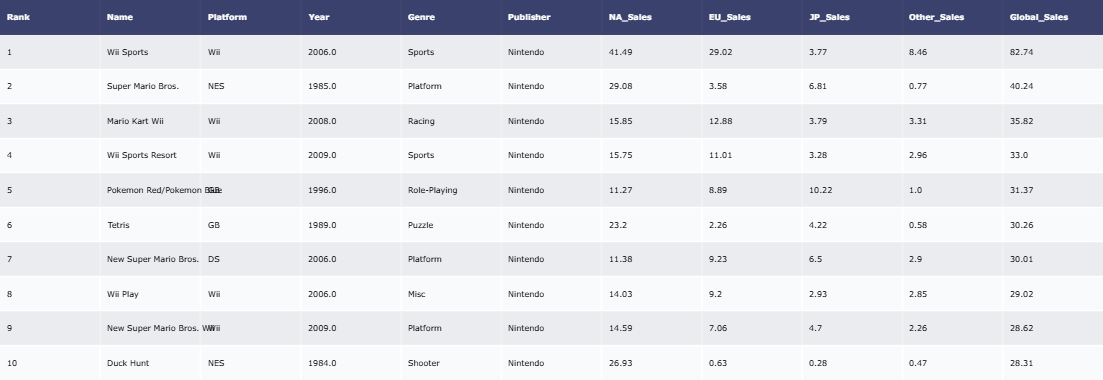

In [9]:
d=df.head(10)
table = ff.create_table(d)
for i in range(len(table.layout.annotations)):
    table.layout.annotations[i].font.size = 8
iplot(table)

# EDA

In [11]:
def check_dataframe(dataframe):
    print("------------------------------------NaN Values------------------------------------")
    print(dataframe.isnull().sum())
    print("------------------------------------Head------------------------------------")
    print(dataframe.head())
    print("------------------------------------Tail------------------------------------")
    print(dataframe.tail())
    print("------------------------------------Describe------------------------------------")
    print(dataframe.describe().T)
    print("------------------------------------Info------------------------------------")
    print(dataframe.info())
    print("------------------------------------Shape------------------------------------")
    print(dataframe.shape)

In [138]:
check_dataframe(df)

------------------------------------NaN Values------------------------------------
Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
Total_Sales     0
Years_CAT       0
NEW_PLATFORM    0
dtype: int64
------------------------------------Head------------------------------------
   Rank                      Name Platform  Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Total_Sales  \
0     41.49     29.02      3.77         8.4

In [140]:
def cat_summary(dataframe, col_name):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))


In [142]:
data = pd.read_csv("vgsales.csv")
df = data.copy()
cat_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() < 20]
cat_cols

['Genre']

for col in cat_cols:
    cat_summary(df, col)

In [144]:
cat_summary(df, "Publisher")

                              Publisher     Ratio
Publisher                                        
Electronic Arts                    1351  8.139535
Activision                          975  5.874202
Namco Bandai Games                  932  5.615134
Ubisoft                             921  5.548861
Konami Digital Entertainment        832  5.012652
...                                 ...       ...
Warp                                  1  0.006025
New                                   1  0.006025
Elite                                 1  0.006025
Evolution Games                       1  0.006025
UIG Entertainment                     1  0.006025

[578 rows x 2 columns]


In [17]:
df[df["Publisher"] == "Unknown"]

Rank                                               Name Platform  \
940      942                    Gran Turismo Concept 2001 Tokyo      PS2   
1649    1651                                NASCAR Thunder 2003      PS2   
2114    2116                                       Suikoden III      PS2   
2173    2175                                   Wheel of Fortune      PS2   
2236    2238                       Teenage Mutant Ninja Turtles      GBA   
...      ...                                                ...      ...   
16460  16463     Horse Life 4: My Horse, My Friend, My Champion      3DS   
16493  16496                                         The Smurfs      3DS   
16532  16535                            STORM: Frontline Nation       PC   
16545  16548  The Treasures of Mystery Island 3 Pack - Save ...       PC   
16581  16584                                          Fit & Fun      Wii   

         Year         Genre Publisher  NA_Sales  EU_Sales  JP_Sales  \
940    2001.0        Racing   Unknown      0.00      1.10      0.42   
1649      NaN        Racing   Unknown      0.60      0.46      0.00   
2114      NaN  Role-Playing   Unknown      0.29      0.23      0.38   
2173      NaN          Misc   Unknown      0.47      0.36      0.00   
2236   2003.0        Action   Unknown      0.67      0.25      0.00   
...       ...           ...       ...       ...       ...       ...   
16460  2015.0        Action   Unknown      0.00      0.01      0.00   
16493     NaN        Action   Unknown      0.00      0.01      0.00   
16532  2011.0      Strategy   Unknown      0.00      0.01      0.00   
16545  2011.0        Puzzle   Unknown      0.01      0.00      0.00   
16581  2011.0        Sports   Unknown      0.00      0.01      0.00   

       Other_Sales  Global_Sales  
940           0.33          1.84  
1649          0.16          1.22  
2114          0.08          0.98  
2173          0.12          0.95  
2236          0.02          0.93  
...            ...           ...  
16460         0.00          0.01  
16493         0.00          0.01  
16532         0.00          0.01  
16545         0.00          0.01  
16581         0.00          0.01  

[203 rows x 11 columns]

In [146]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

In [148]:
num_cols = [col for col in df.columns if df[col].dtypes in [int, float]]
num_cols

['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

In [25]:
for col in num_cols:
    num_summary(df, col)
    print("*" * 50)

count    16327.000000
mean      2006.406443
std          5.828981
min       1980.000000
5%        1996.000000
10%       1998.000000
20%       2002.000000
30%       2004.000000
40%       2006.000000
50%       2007.000000
60%       2009.000000
70%       2010.000000
80%       2011.000000
90%       2013.000000
95%       2015.000000
99%       2016.000000
max       2020.000000
Name: Year, dtype: float64
**************************************************
count    16598.000000
mean         0.264667
std          0.816683
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.010000
40%          0.040000
50%          0.080000
60%          0.120000
70%          0.190000
80%          0.310000
90%          0.610000
95%          1.060000
99%          2.800000
max         41.490000
Name: NA_Sales, dtype: float64
**************************************************
count    16598.000000
mean         0.146652
std          0.505351
min          0.000000
5%  

# Model

vgsales analyser model is a machine learning model used to analyze and predict video games sales data it designed to help game developers the model typically takes account various factor that can influence video game sales such as 

1 Game genre and game sales 

2 platform (e.g playstation,xbox, nintendo switch,pc

# Missing value 

In [150]:
df[df.isnull().any(axis=1)]

Rank                             Name Platform    Year         Genre  \
179      180                  Madden NFL 2004      PS2     NaN        Sports   
377      378                 FIFA Soccer 2004      PS2     NaN        Sports   
431      432       LEGO Batman: The Videogame      Wii     NaN        Action   
470      471       wwe Smackdown vs. Raw 2006      PS2     NaN      Fighting   
607      608                   Space Invaders     2600     NaN       Shooter   
...      ...                              ...      ...     ...           ...   
16427  16430                     Virtua Quest       GC     NaN  Role-Playing   
16493  16496                       The Smurfs      3DS     NaN        Action   
16494  16497  Legends of Oz: Dorothy's Return      3DS  2014.0        Puzzle   
16543  16546           Driving Simulator 2011       PC  2011.0        Racing   
16553  16556                   Bound By Flame     X360  2014.0  Role-Playing   

                                    Publisher  NA_Sales  EU_Sales  JP_Sales  \
179                           Electronic Arts      4.26      0.26      0.01   
377                           Electronic Arts      0.59      2.36      0.04   
431    Warner Bros. Interactive Entertainment      1.86      1.02      0.00   
470                                       NaN      1.57      1.02      0.00   
607                                     Atari      2.36      0.14      0.00   
...                                       ...       ...       ...       ...   
16427                                 Unknown      0.01      0.00      0.00   
16493                                 Unknown      0.00      0.01      0.00   
16494                                     NaN      0.00      0.01      0.00   
16543                                     NaN      0.00      0.01      0.00   
16553                                     NaN      0.00      0.01      0.00   

       Other_Sales  Global_Sales  
179           0.71          5.23  
377           0.51          3.49  
431           0.29          3.17  
470           0.41          3.00  
607           0.03          2.53  
...            ...           ...  
16427         0.00          0.01  
16493         0.00          0.01  
16494         0.00          0.01  
16543         0.00          0.01  
16553         0.00          0.01  

[307 rows x 11 columns]

In [152]:
data = pd.read_csv("vgsales.csv")
df = data.copy()

In [154]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [38]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns

In [40]:
missing_values_table(df, True)

           n_miss  ratio
Year          271   1.63
Publisher      58   0.35


['Year', 'Publisher']

In [42]:
print(f"Min Year: {df.Year.min()}")
print(f"Max Year: {df.Year.max()}")

Min Year: 1980.0
Max Year: 2020.0


In [44]:
data = pd.read_csv("vgsales.csv")
df = data.copy()

In [48]:



import missingno as msno

try:
    msno.heatmap(df)
except ValueError as e:
    print(f"An error occurred: {e}")
    print("Make sure your dataframe contains only numerical values.")

C:\Users\EGtech\.anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



An error occurred: could not convert string to float: '--'
Make sure your dataframe contains only numerical values.


In [50]:
df["Year"] = df["Year"].fillna(df["Year"].median())

In [52]:
df["Year"] = df["Year"].astype(int)

In [54]:
df.Year.isnull().sum()

0

In [56]:
df.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [58]:
df["Publisher"].fillna("Unknown", inplace=True)

In [60]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [62]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [64]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 16598
Variables: 11
cat_cols: 1
num_cols: 7
cat_but_car: 3
num_but_cat: 0


In [66]:
print(f"Categorical: {cat_cols}")
print(f"Numerical: {num_cols}")
print(f"Categorical but Cardinal: {cat_but_car}")

Categorical: ['Genre']
Numerical: ['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
Categorical but Cardinal: ['Name', 'Platform', 'Publisher']


# Top Selling Game Genre

In [69]:
# Genre
df["Genre"].value_counts()

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64

In [71]:
df["Total_Sales"] = df.NA_Sales + df.JP_Sales + df.EU_Sales + df.Other_Sales + df.Global_Sales

In [73]:
df.head()

Rank                      Name Platform  Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Total_Sales  
0     41.49     29.02      3.77         8.46         82.74       165.48  
1     29.08      3.58      6.81         0.77         40.24        80.48  
2     15.85     12.88      3.79         3.31         35.82        71.65  
3     15.75     11.01      3.28         2.96         33.00        66.00  
4     11.27      8.89     10.22         1.00         31.37        62.75

In [75]:

df.groupby(["Genre"]).agg({"Total_Sales": "mean"}).sort_values(by="Total_Sales" ,ascending=False).reset_index()


Genre  Total_Sales
0       Platform     1.876309
1        Shooter     1.583366
2   Role-Playing     1.246391
3         Racing     1.171986
4         Sports     1.134471
5       Fighting     1.058785
6         Action     1.055893
7           Misc     0.931144
8     Simulation     0.904394
9         Puzzle     0.840842
10      Strategy     0.513921
11     Adventure     0.371579

## We can understand this by creating a year category and looking at the year range of the most sold type.

In [78]:
years = ["1980_1990", "1990_2000", "2000_2010", "2010_2020"]
df["Years_CAT"] = pd.cut(df.Year, labels=years, bins=4)

In [80]:
df["Years_CAT"].value_counts()

Years_CAT
2000_2010    10389
2010_2020     3886
1990_2000     2102
1980_1990      221
Name: count, dtype: int64

In [82]:
df.groupby(["Genre", "Years_CAT"]).agg({"Total_Sales": "mean"}).sort_values(by="Total_Sales", ascending=False).reset_index().head(10)

C:\Users\EGtech\AppData\Local\Temp\ipykernel_3680\1376532452.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Genre  Years_CAT  Total_Sales
0      Platform  1980_1990     8.068889
1        Puzzle  1980_1990     6.546190
2     Adventure  1980_1990     4.780000
3       Shooter  1980_1990     3.985333
4        Racing  1980_1990     3.671000
5      Fighting  1980_1990     3.620000
6  Role-Playing  1980_1990     3.594545
7      Platform  1990_2000     2.766712
8        Sports  1980_1990     2.645385
9       Shooter  2010_2020     2.454108

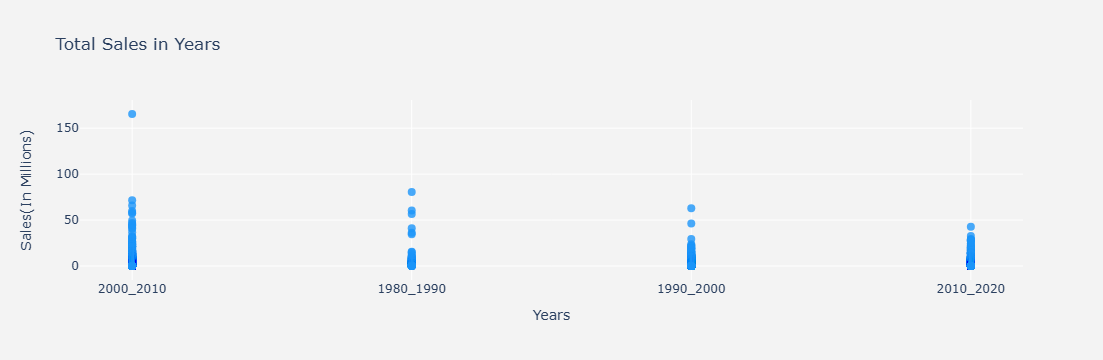

In [84]:
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.tools import FigureFactory as ff
import matplotlib.pyplot as plt
trace1 = go.Scatter(
                    x = df.Years_CAT,
                    y = df.Total_Sales,
                    mode = "markers",
                    name = "Years - Sales",
                    marker = dict(color = 'rgba(28, 149, 249, 0.8)',size=8),
                    text= df.Name)

data = [trace1]
layout = dict(title = 'Total Sales in Years',
              xaxis= dict(title= 'Years',ticklen= 5,zeroline= False,zerolinewidth=1,gridcolor="white"),
              yaxis= dict(title= 'Sales(In Millions)',ticklen= 5,zeroline= False,zerolinewidth=1,gridcolor="white",),
              paper_bgcolor='rgb(243, 243, 243)',
              plot_bgcolor='rgb(243, 243, 243)' )
fig = dict(data = data, layout = layout)
iplot(fig)

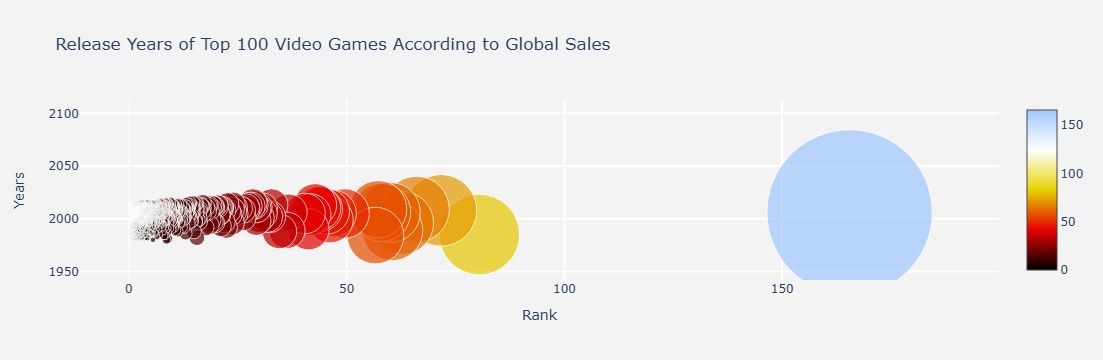

In [85]:
fig={
    "data" : [
    {
        'x': df.Total_Sales,
        'y': df.Year,
        'mode': 'markers',
        'marker': {
            "color":df.Total_Sales,
            'size': df.Total_Sales,
            'showscale': True,
            "colorscale":'Blackbody'
        },
        "text" :  "Name:"+ df.Name +","+" Publisher:" + df.Publisher
        
    },
],
"layout":
    {
    "title":"Release Years of Top 100 Video Games According to Global Sales",
    "xaxis":{
        "title":"Rank",
        "gridcolor":'rgb(255, 255, 255)',
        "zerolinewidth":1,
        "ticklen":5,
        "gridwidth":2,
    },
    "yaxis":{
        "title":'Years',
        "gridcolor":'rgb(255, 255, 255)',
        "zerolinewidth":1,
        "ticklen":5,
        "gridwidth":2,
    },
    
    "paper_bgcolor":'rgb(243, 243, 243)',
    "plot_bgcolor":'rgb(243, 243, 243)'
    }}

iplot(fig)

## Below we see the 10 best-selling games and which genre they belong to, it is remarkable that there are only 2 Platform types in the list

In [87]:
df.groupby(["Genre", "Name"]).agg({"Total_Sales": "mean"}).sort_values(by="Total_Sales", ascending=False).head(10)

Total_Sales
Genre        Name                                  
Sports       Wii Sports                      165.48
Racing       Mario Kart Wii                   71.65
Sports       Wii Sports Resort                66.00
Role-Playing Pokemon Red/Pokemon Blue         62.75
Platform     New Super Mario Bros.            60.02
Misc         Wii Play                         58.03
Platform     New Super Mario Bros. Wii        57.23
Shooter      Duck Hunt                        56.62
Simulation   Nintendogs                       49.51
Racing       Mario Kart DS                    46.85

In [88]:
df["Genre"].value_counts()

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64

In [89]:
df[df["Genre"] == "Platform"].describe().T

count         mean          std      min      25%       50%  \
Rank          886.0  6927.251693  4785.870483     2.00  2603.75  6233.000   
Year          886.0  2003.856659     6.361501  1981.00  2001.00  2004.000   
NA_Sales      886.0     0.504571     1.502039     0.00     0.05     0.140   
EU_Sales      886.0     0.227573     0.588545     0.00     0.01     0.050   
JP_Sales      886.0     0.147596     0.525242     0.00     0.00     0.000   
Other_Sales   886.0     0.058228     0.166151     0.00     0.00     0.010   
Global_Sales  886.0     0.938341     2.585254     0.01     0.09     0.280   
Total_Sales   886.0     1.876309     5.170662     0.02     0.18     0.555   

                     75%       max  
Rank          10942.7500  16600.00  
Year           2008.0000   2016.00  
NA_Sales          0.4400     29.08  
EU_Sales          0.1900      9.23  
JP_Sales          0.0400      6.81  
Other_Sales       0.0500      2.90  
Global_Sales      0.7900     40.24  
Total_Sales       1.5875     80.48

In [90]:
df[df["Genre"] == "Sports"].describe().T

count         mean          std      min        25%      50%  \
Rank          2346.0  7425.026428  4444.167960     1.00  3613.5000  7186.50   
Year          2346.0  2005.505115     5.586629  1980.00  2002.0000  2006.00   
NA_Sales      2346.0     0.291283     1.041024     0.00     0.0200     0.11   
EU_Sales      2346.0     0.160635     0.776772     0.00     0.0000     0.02   
JP_Sales      2346.0     0.057702     0.223647     0.00     0.0000     0.00   
Other_Sales   2346.0     0.057532     0.243892     0.00     0.0000     0.01   
Global_Sales  2346.0     0.567319     2.089716     0.01     0.0900     0.22   
Total_Sales   2346.0     1.134471     4.179517     0.02     0.1825     0.44   

                   75%       max  
Rank          10908.00  16590.00  
Year           2009.00   2016.00  
NA_Sales          0.30     41.49  
EU_Sales          0.11     29.02  
JP_Sales          0.01      3.77  
Other_Sales       0.04      8.46  
Global_Sales      0.56     82.74  
Total_Sales       1.11    165.48

In [91]:
df[df["Genre"] == "Action"].describe().T

count         mean          std      min      25%      50%  \
Rank          3316.0  7973.879071  4712.089630    17.00  4009.00  7759.00   
Year          3316.0  2007.892642     6.016412  1980.00  2005.00  2009.00   
NA_Sales      3316.0     0.264726     0.566890     0.00     0.02     0.10   
EU_Sales      3316.0     0.158323     0.407424     0.00     0.00     0.03   
JP_Sales      3316.0     0.048236     0.164835     0.00     0.00     0.00   
Other_Sales   3316.0     0.056508     0.239754     0.00     0.00     0.01   
Global_Sales  3316.0     0.528100     1.156427     0.01     0.07     0.19   
Total_Sales   3316.0     1.055893     2.312965     0.02     0.14     0.39   

                   75%       max  
Rank          12049.50  16592.00  
Year           2012.00   2017.00  
NA_Sales          0.26      9.63  
EU_Sales          0.15      9.27  
JP_Sales          0.03      3.96  
Other_Sales       0.05     10.57  
Global_Sales      0.50     21.40  
Total_Sales       1.00     42.79

## The platform genre's high value in Global sales seems to be enough to make it a top seller.

# Top Selling Game

## Before starting this analysis, I would like to gather the scattered platforms under one roof.

In [95]:
df.loc[(df["Platform"] == "PS4"), "NEW_PLATFORM"] = "PS"
df.loc[(df["Platform"] == "PS3"), "NEW_PLATFORM"] = "PS"
df.loc[(df["Platform"] == "PS2"), "NEW_PLATFORM"] = "PS"
df.loc[(df["Platform"] == "PS4"), "NEW_PLATFORM"] = "PS"
df.loc[(df["Platform"] == "PS"), "NEW_PLATFORM"] = "PS"
df.loc[(df["Platform"] == "PSV"), "NEW_PLATFORM"] = "PS"

In [96]:
df.loc[(df["Platform"] == "DS"), "NEW_PLATFORM"] = "NINTENDO"
df.loc[(df["Platform"] == "Wii"), "NEW_PLATFORM"] = "NINTENDO"
df.loc[(df["Platform"] == "GBA"), "NEW_PLATFORM"] = "NINTENDO"
df.loc[(df["Platform"] == "GC"), "NEW_PLATFORM"] = "NINTENDO"
df.loc[(df["Platform"] == "3DS"), "NEW_PLATFORM"] = "NINTENDO"
df.loc[(df["Platform"] == "N64"), "NEW_PLATFORM"] = "NINTENDO"
df.loc[(df["Platform"] == "SNES"), "NEW_PLATFORM"] = "NINTENDO"
df.loc[(df["Platform"] == "WiiU"), "NEW_PLATFORM"] = "NINTENDO"
df.loc[(df["Platform"] == "NES"), "NEW_PLATFORM"] = "NINTENDO"

In [109]:
df.loc[(df["Platform"] == "X360"), "NEW_PLATFORM"] = "XBOX"
df.loc[(df["Platform"] == "XB"), "NEW_PLATFORM"] = "XBOX"
df.loc[(df["Platform"] == "XOne"), "NEW_PLATFORM"] = "XBOX"

In [111]:
df.loc[(df["Platform"] == "PC"), "NEW_PLATFORM"] = "PC"

In [113]:
df.loc[(df["Platform"] == "2600"), "NEW_PLATFORM"] = "ATARI"

In [115]:
df.loc[(df["Platform"] == "SAT"), "NEW_PLATFORM"] = "OTHER"
df.loc[(df["Platform"] == "GB"), "NEW_PLATFORM"] = "OTHER"
df.loc[(df["Platform"] == "DC"), "NEW_PLATFORM"] = "OTHER"
df.loc[(df["Platform"] == "GEN"), "NEW_PLATFORM"] = "OTHER"
df.loc[(df["Platform"] == "NG"), "NEW_PLATFORM"] = "OTHER"
df.loc[(df["Platform"] == "WS"), "NEW_PLATFORM"] = "OTHER"
df.loc[(df["Platform"] == "SCD"), "NEW_PLATFORM"] = "OTHER"
df.loc[(df["Platform"] == "3DO"), "NEW_PLATFORM"] = "OTHER"
df.loc[(df["Platform"] == "TG16"), "NEW_PLATFORM"] = "OTHER"
df.loc[(df["Platform"] == "PCFX"), "NEW_PLATFORM"] = "OTHER"
df.loc[(df["Platform"] == "GG"), "NEW_PLATFORM"] = "OTHER"

In [117]:
df.groupby(["NEW_PLATFORM", "Name"]).agg({"Total_Sales": "mean"}).sort_values(by="Total_Sales", ascending=False).head(20)

Total_Sales
NEW_PLATFORM Name                                                     
NINTENDO     Wii Sports                                         165.48
             Super Mario Bros.                                   80.48
             Mario Kart Wii                                      71.65
             Wii Sports Resort                                   66.00
OTHER        Pokemon Red/Pokemon Blue                            62.75
             Tetris                                              60.52
NINTENDO     New Super Mario Bros.                               60.02
             Wii Play                                            58.03
             New Super Mario Bros. Wii                           57.23
             Duck Hunt                                           56.62
             Nintendogs                                          49.51
             Mario Kart DS                                       46.85
OTHER        Pokemon Gold/Pokemon Silver                         46.19
NINTENDO     Wii Fit                                             45.44
             Wii Fit Plus                                        44.00
XBOX         Kinect Adventures!                                  43.64
PS           Grand Theft Auto: San Andreas                       41.62
NINTENDO     Brain Age: Train Your Brain in Minutes a Day        40.44
             Pokemon Diamond/Pokemon Pearl                       36.71
OTHER        Super Mario Land                                    36.28

In [119]:
xaction=df[df.Genre=="Action"]
xsports=df[df.Genre=="Sports"]
xmisc=df[df.Genre=="Misc"]
xrole=df[df.Genre=="Role-Playing"]
xshooter=df[df.Genre=="Shooter"]
xadventure=df[df.Genre=="Adventure"]
xrace=df[df.Genre=="Racing"]
xplatform=df[df.Genre=="Platform"]
xsimulation=df[df.Genre=="Simulation"]
xfight=df[df.Genre=="Fighting"]
xstrategy=df[df.Genre=="Strategy"]
xpuzzle=df[df.Genre=="Puzzle"]

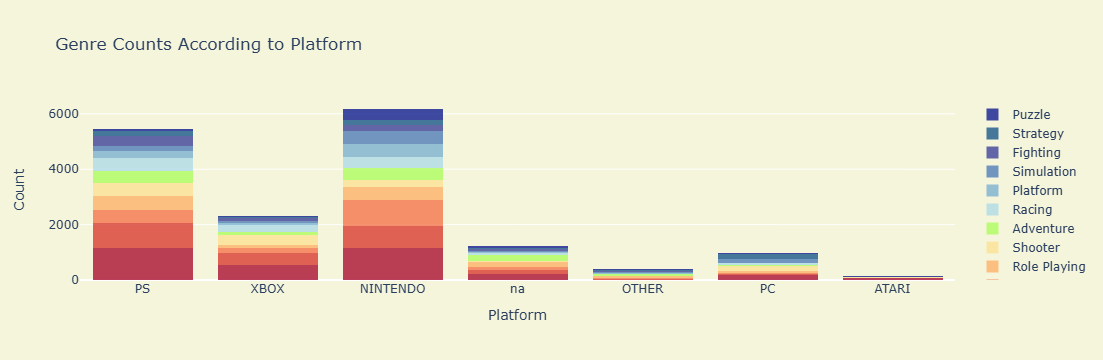

In [121]:
trace1 = go.Histogram(
    x=xaction.NEW_PLATFORM,
    opacity=0.75,
    name = "Action",
    marker=dict(color='rgb(165,0,38)'))
trace2 = go.Histogram(
    x=xsports.NEW_PLATFORM,
    opacity=0.75,
    name = "Sports",
    marker=dict(color='rgb(215,48,39)'))
trace3 = go.Histogram(
    x=xmisc.NEW_PLATFORM,
    opacity=0.75,
    name = "Misc",
    marker=dict(color='rgb(244,109,67)'))
trace4 = go.Histogram(
    x=xrole.NEW_PLATFORM,
    opacity=0.75,
    name = "Role Playing",
    marker=dict(color='rgb(253,174,97)'))
trace5 = go.Histogram(
    x=xshooter.NEW_PLATFORM,
    opacity=0.75,
    name = "Shooter",
    marker=dict(color='rgb(254,224,144)'))
trace6 = go.Histogram(
    x=xadventure.NEW_PLATFORM,
    opacity=0.75,
    name = "Adventure",
    marker=dict(color='rgb(170,253,87)'))
trace7 = go.Histogram(
    x=xrace.NEW_PLATFORM,
    opacity=0.75,
    name = "Racing",
    marker=dict(color='rgb(171,217,233)'))
trace8 = go.Histogram(
    x=xplatform.NEW_PLATFORM,
    opacity=0.75,
    name = "Platform",
    marker=dict(color='rgb(116,173,209)'))
trace9 = go.Histogram(
    x=xsimulation.NEW_PLATFORM,
    opacity=0.75,
    name = "Simulation",
    marker=dict(color='rgb(69,117,180)'))
trace10 = go.Histogram(
    x=xfight.NEW_PLATFORM,
    opacity=0.75,
    name = "Fighting",
    marker=dict(color='rgb(49,54,149)'))
trace11 = go.Histogram(
    x=xstrategy.NEW_PLATFORM,
    opacity=0.75,
    name = "Strategy",
    marker=dict(color="rgb(10,77,131)"))
trace12 = go.Histogram(
    x=xpuzzle.NEW_PLATFORM,
    opacity=0.75,
    name = "Puzzle",
    marker=dict(color='rgb(1,15,139)'))

data = [trace1, trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9,trace10,trace11,trace12]
layout = go.Layout(barmode='stack',
                   title='Genre Counts According to Platform',
                   xaxis=dict(title='Platform'),
                   yaxis=dict( title='Count'),
                   paper_bgcolor='beige',
                   plot_bgcolor='beige'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

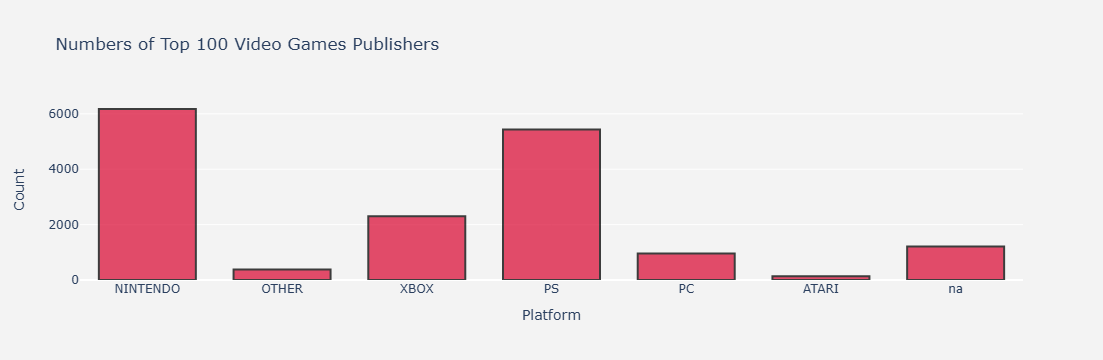

In [123]:
import plotly.graph_objs as go

trace = go.Histogram(x=df.NEW_PLATFORM,marker=dict(color="crimson",line=dict(color='black', width=2)),opacity=0.75)
layout = go.Layout(
    title='Numbers of Top 100 Video Games Publishers',
    xaxis=dict(
        title='Platform'
    ),
    yaxis=dict(
        title='Count'
    ),
    bargap=0.2,
    bargroupgap=0.1, paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor="rgb(243, 243, 243)")
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

## Nintendo seems to have taken the lead with the influence of the best selling game platform, Wii Sports and Mario

# Top Selling Game of All Time

In [127]:
df.groupby("Name").agg({"Total_Sales": "mean"}).sort_values(by="Total_Sales", ascending=False).head(100)

Total_Sales
Name                                                 
Wii Sports                                     165.48
Mario Kart Wii                                  71.65
Wii Sports Resort                               66.00
Pokemon Red/Pokemon Blue                        62.75
New Super Mario Bros.                           60.02
...                                               ...
Metal Gear Solid 2: Sons of Liberty             12.10
Metal Gear Solid 4: Guns of the Patriots        12.06
Sonic the Hedgehog 2                            12.05
Grand Theft Auto: San Andreas                   11.93
Final Fantasy XII                               11.90

[100 rows x 1 columns]

In [129]:
df[df["Name"] == "Grand Theft Auto V"]

Rank                Name Platform  Year   Genre             Publisher  \
16      17  Grand Theft Auto V      PS3  2013  Action  Take-Two Interactive   
23      24  Grand Theft Auto V     X360  2013  Action  Take-Two Interactive   
44      45  Grand Theft Auto V      PS4  2014  Action  Take-Two Interactive   
197    198  Grand Theft Auto V     XOne  2014  Action  Take-Two Interactive   
1896  1898  Grand Theft Auto V       PC  2015  Action  Take-Two Interactive   

      NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Total_Sales  \
16        7.01      9.27      0.97         4.14         21.40        42.79   
23        9.63      5.31      0.06         1.38         16.38        32.76   
44        3.80      5.81      0.36         2.02         11.98        23.97   
197       2.66      2.01      0.00         0.41          5.08        10.16   
1896      0.36      0.64      0.00         0.08          1.08         2.16   

      Years_CAT NEW_PLATFORM  
16    2010_2020           PS  
23    2010_2020         XBOX  
44    2010_2020           PS  
197   2010_2020         XBOX  
1896  2010_2020           PC

In [131]:
df[df["Name"] == "Call of Duty: Black Ops II"]

Rank                        Name Platform  Year    Genre   Publisher  \
34      35  Call of Duty: Black Ops II      PS3  2012  Shooter  Activision   
35      36  Call of Duty: Black Ops II     X360  2012  Shooter  Activision   
1217  1219  Call of Duty: Black Ops II       PC  2012  Shooter  Activision   
4554  4556  Call of Duty: Black Ops II     WiiU  2012  Shooter  Activision   

      NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Total_Sales  \
34        4.99      5.88      0.65         2.52         14.03        28.07   
35        8.25      4.30      0.07         1.12         13.73        27.47   
1217      0.63      0.69      0.00         0.21          1.53         3.06   
4554      0.21      0.18      0.00         0.03          0.43         0.85   

      Years_CAT NEW_PLATFORM  
34    2010_2020           PS  
35    2010_2020         XBOX  
1217  2010_2020           PC  
4554  2010_2020     NINTENDO

In [133]:
df[df["Name"] == "Wii Sports"]

Rank        Name Platform  Year   Genre Publisher  NA_Sales  EU_Sales  \
0     1  Wii Sports      Wii  2006  Sports  Nintendo     41.49     29.02   

   JP_Sales  Other_Sales  Global_Sales  Total_Sales  Years_CAT NEW_PLATFORM  
0      3.77         8.46         82.74       165.48  2000_2010     NINTENDO

# It caught my attention that a game like Grand Theft Auto V is not on the list. Upon this, with a little research, I saw that the Grand Theft Auto V game was released at different times for different platforms and the sales on this platform were kept separately. For GTA, sales are divided by platforms and release dates are different. This is valid for many games, it would be very detailed and challenging to collect them all... Even if we collect them, GTA V can only be placed in the second place, so the best selling game is Wii Sports again.

In [136]:
import plotly.graph_objs as go
top100 = df.head(100)

## 52 of the top 100 games were published by Nintendo and 14 by Activision

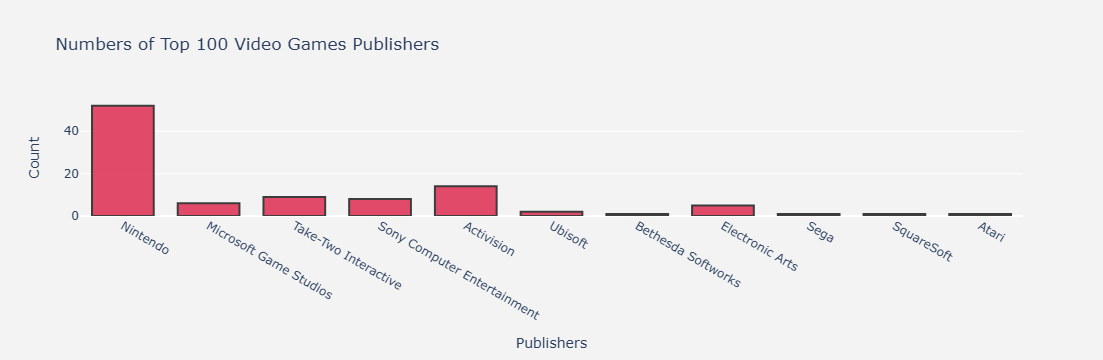

In [139]:
trace = go.Histogram(x=top100.Publisher,marker=dict(color="crimson",line=dict(color='black', width=2)),opacity=0.75)
layout = go.Layout(
    title='Numbers of Top 100 Video Games Publishers',
    xaxis=dict(
        title='Publishers'
    ),
    yaxis=dict(
        title='Count'
    ),
    bargap=0.2,
    bargroupgap=0.1, paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor="rgb(243, 243, 243)")
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

# Which region plays more games?

In [142]:


genre=pd.DataFrame(df.groupby("Genre")[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]].sum())
genre.reset_index(level=0, inplace=True)
genrecount=pd.DataFrame(df["Genre"].value_counts())
genrecount.reset_index(level=0, inplace=True)
genrecount.rename(columns={"Genre": "Counts","index":"Genre"}, inplace=True)




In [144]:
data = pd.read_csv("vgsales.csv")
df = data.copy()
table_data=genre[["Genre","NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]]
table_data = table_data.rename(columns = {"NA_Sales": "North America", 
                                  "EU_Sales":"Europe", 
                                  "JP_Sales": "Japan","Other_Sales":"Other","Global_Sales":"Total"})

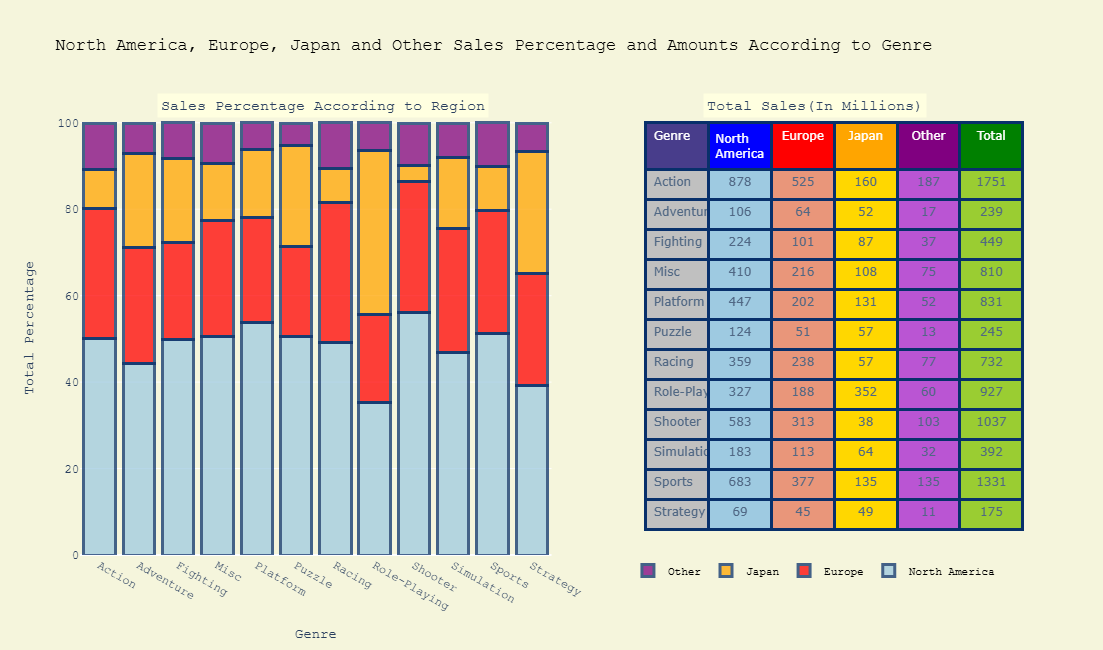

In [146]:
x=genre.Genre
NA_Perce=list(genre["NA_Sales"]/genre["Global_Sales"]*100)
EU_Perce=list(genre["EU_Sales"]/genre["Global_Sales"]*100)
JP_Perce=list(genre["JP_Sales"]/genre["Global_Sales"]*100)
Other_Perce=list(genre["Other_Sales"]/genre["Global_Sales"]*100)

trace1 = go.Bar(
    x=x,
    y=NA_Perce,
    name="North America" ,
    xaxis='x2', yaxis='y2',
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=3),
        ),
    opacity=0.75)
trace2 = go.Bar(
    x=x,
    y=EU_Perce,
    xaxis='x2', yaxis='y2',
    marker=dict(
        color='red',
        line=dict(
            color='rgb(8,48,107)',
            width=3),
        ),
    opacity=0.75,
    name = "Europe",
    )
trace3 = go.Bar(
    x=x,
    y=JP_Perce,
    xaxis='x2', yaxis='y2',
  
    marker=dict(
        color='orange',
        line=dict(
            color='rgb(8,48,107)',
            width=3),
        ),
    opacity=0.75,
    name = "Japan",
    )
trace4 = go.Bar(
    x=x,
    y=Other_Perce,
    xaxis='x2', yaxis='y2',
    
    marker=dict(
        color='purple',
        line=dict(
            color='rgb(8,48,107)',
            width=3),
        ),
    opacity=0.75,
    name = "Other",)
trace5=go.Table(
  header = dict(
    values = table_data.columns,
    line = dict(color = 'rgb(8,48,107)',width=3),
    fill = dict(color = ["darkslateblue","blue","red", "orange","purple","green"]),
    align = ['left','center'],
    font = dict(color = 'white', size = 12),
     height=30,
  ),
  cells = dict(
    values = [table_data.Genre,round(table_data["North America"]),round(table_data["Europe"]), round(table_data["Japan"]), round(table_data["Other"]),round(table_data["Total"])],
    height=30,
    line = dict(color = 'rgb(8,48,107)',width=3),
    fill = dict(color = ["silver","rgb(158,202,225)","darksalmon", "gold","mediumorchid","yellowgreen"]),
    align = ['left', 'center'],
    font = dict(color = '#506784', size = 12)),
    domain=dict(x=[0.60,1],y=[0,0.95]),
)

data = [trace1, trace2,trace3,trace4,trace5]
layout = go.Layout(barmode='stack',autosize=False,width=1200,height=650,
                legend=dict(x=.58, y=0,orientation="h",font=dict(family='Courier New, monospace',size=11,color='#000'),
                           bgcolor='beige', bordercolor='beige', borderwidth=1),
                title='North America, Europe, Japan and Other Sales Percentage and Amounts According to Genre',
                titlefont=dict(family='Courier New, monospace',size=17,color='black'),
                xaxis2=dict(domain=[0, 0.50],anchor="y2", title='Genre',titlefont=dict(family='Courier New, monospace'),tickfont=dict(family='Courier New, monospace')), yaxis2=dict( domain=[0, 1],anchor='x2',title="Total Percentage",titlefont=dict(family='Courier New, monospace'),tickfont=dict(family='Courier New, monospace')),
                paper_bgcolor='beige',plot_bgcolor='beige',
                annotations=[ dict( text='Sales Percentage According to Region',x=0.08,y=1.02,xref="paper",yref="paper",showarrow=False,font=dict(size=15,family="Courier New, monospace"),bgcolor="lightyellow",borderwidth=5),dict( text='Total Sales(In Millions)',x=0.9,y=1.02,xref="paper",yref="paper",showarrow=False,font=dict(size=15,family='Courier New, monospace'),bgcolor="lightyellow",borderwidth=5)],
              
                  )
fig = go.Figure(data=data, layout=layout)
iplot(fig)

## - It's evident from the number of sales that North America likes gaming more.
## - looks like less action, more demand for puzzles and role-playing in Japan.
## - The demand for action and shooter games in North America seems to be quite high.  Approximately 50 percent of the total sales of the action genre were sold in North America.The big impact of this could be GTA love :)

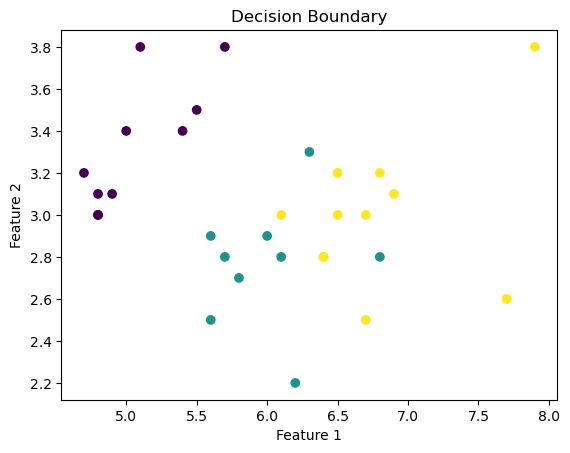

In [164]:
import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary")
plt.show()

# Training and test split

To do this import the train_test_split from the sklearn.model_section library and pass the x,y parameters

In [204]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


for i in range(100, 200, 10):
    print(f"values of estimators = {i}")
    model = RandomForestClassifier(n_estimators=i)

    
    model.fit(x_train, y_train)
    print(f"{model.score(x_test, y_test) * 100:.2f}%")

values of estimators = 100
95.00%
values of estimators = 110
94.17%
values of estimators = 120
95.00%
values of estimators = 130
95.00%
values of estimators = 140
95.00%
values of estimators = 150
95.00%
values of estimators = 160
95.00%
values of estimators = 170
95.00%
values of estimators = 180
95.00%
values of estimators = 190
95.00%


In [220]:
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [182]:
import pickle

In [210]:
pickle.dump(df, open("vgsales_model_1.pkl", "wb"))

In [222]:
pickle.load(open("vgsales_model_1.pkl", "rb"))

Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sports    Nintendo     41.49     29.02      3.77   
1      1985.0      Platform    Nintendo     29.08      3.58      6.81   
2      2008.0        Racing    Nintendo     15.85     12.88      3.79   
3      2009.0        Sports    Nintendo     15.75     11.01      3.28   
4      1996.0  Role-Playing    Nintendo     11.27      8.89     10.22   
...       ...           ...         ...       ...       ...       ...   
16593  2002.0      Platform       Kemco      0.01      0.00      0.00   
16594  2003.0       Shooter  Infogrames      0.01      0.00      0.00   
16595  2008.0        Racing  Activision      0.00      0.00      0.00   
16596  2010.0        Puzzle    7G//AMES      0.00      0.01      0.00   
16597  2003.0      Platform     Wanadoo      0.01      0.00      0.00   

       Other_Sales  Global_Sales  
0             8.46         82.74  
1             0.77         40.24  
2             3.31         35.82  
3             2.96         33.00  
4             1.00         31.37  
...            ...           ...  
16593         0.00          0.01  
16594         0.00          0.01  
16595         0.00          0.01  
16596         0.00          0.01  
16597         0.00          0.01  

[16598 rows x 11 columns]

In [242]:
loaded_model = pickle.load(open("vgsales_model_1.pkl", "rb"))